In [1]:
import numpy as np
from tenpy.networks.mps import MPS
from tenpy.models.hubbard import FermiHubbardModel
from tenpy.algorithms import dmrg

import pickle, time
import matplotlib.pyplot as plt

In [68]:
def run_dmrg_half_filling(L, U, t, mu, chi_max, sweeps, hc_flag=False, charge=0):
    model_params = {
        'L': L,
        'U': U,
        't':t,
        'mu': mu,
        'bc_MPS': 'finite',
        'bc_x':'periodic',
        'explicit_plus_hc':hc_flag
    }

    model = FermiHubbardModel(model_params)

    # Initialize the MPS for half-filling with an alternating pattern of up and down spins
    if charge==0:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['down']
    elif charge==1:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['full']
        if L%2==0: initial_state[-1] = 'full'
    elif charge==-1:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['empty']
        if L%2==0: initial_state[-1] = 'empty'
    psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, bc='finite')

    dmrg_params = {
        'mixer': True,  # Enables mixing for better convergence in difficult phases
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-6
        },
        'max_sweeps': sweeps,
    }

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    E0, psi = eng.run()

    return E0 #, psi.expectation_value('Ntot')



In [66]:
# Parameters
L = 8  # Number of lattice sites (ensure it is even for a simple setup)
U = 4.0  # On-site interaction strength
t = np.exp(1j*np.pi*0.1)  # Hopping term
mu = U/2   # Chemical potential (often set to 0 for simplicity at half filling)
chi_max = 200  # Maximum bond dimension
sweeps = 100  # Number of DMRG sweeps



ground_state_energy = run_dmrg_half_filling(L, U, t, mu, chi_max, sweeps, charge=1)
print("Ground State Energy at Half Filling:", ground_state_energy[0]/L)

Ground State Energy at Half Filling: -2.4630240638293848


In [67]:
ground_state_energy[1].sum()

9.000000000000004

In [29]:
# Example usage:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
k_num = 10
mu = U/2 # chemical potential
chi_max = 600  # max bond dimension
sweeps = 100  # number of DMRG sweeps

U_list = np.array([0.1, 0.2, 0.5, 1, 2, 4, 6, 8])
norb_list = np.array([6, 8, 10])

time_list = np.zeros(shape=(len(U_list), len(norb_list)))
raw_energy_dat = np.zeros(shape=(len(U_list), len(norb_list), 2, k_num))

for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        mu = U/2
        st_time = time.time()
        energy_arr = np.zeros(k_num)
        for kx in range(-int(k_num/2), int(k_num/2)):
            t_star = np.exp(1j*kx/k_num*np.pi)
            raw_energy_dat[i,j,0,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=0)
            raw_energy_dat[i,j,1,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=1)

        time_list[i, j] = time.time() - st_time
        print(U, norb, time_list[i,j])

/home/gaurav/Projects/default/lib/python3.12/site-packages/tenpy/tools/params.py:231: UserWarning: unused option ['conserve'] for config FermiHubbardModel
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/gaurav/Projects/default/lib/python3.12/site-packages/tenpy/tools/params.py:231: UserWarning: unused option ['conserve'] for config FermiHubbardModel
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/gaurav/Projects/default/lib/python3.12/site-packages/tenpy/tools/params.py:231: UserWarning: unused option ['conserve'] for config FermiHubbardModel
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/gaurav/Projects/default/lib/python3.12/site-packages/tenpy/tools/params.py:231: UserWarning: unused option ['conserve'] for config FermiHubbardModel
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/gaurav/Projects/default/lib/python3.12/site-packages/tenpy/tools/params.py:231: UserWarning: unused option ['conse

KeyboardInterrupt: 

In [8]:
data_dict = {}
data_dict['U_list'] = U_list
data_dict['norb_list'] = norb_list
data_dict['raw_energy'] = raw_energy_dat



# Your dictionary

# Saving the dictionary to a pickle file
with open('Charge_gap_OHK_raw_set1.pkl', 'wb') as file:
    pickle.dump(data_dict, file)

In [79]:
# Example usage:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
k_num = 10
mu = U/2 # chemical potential
chi_max = 600  # max bond dimension
sweeps = 100  # number of DMRG sweeps

U_list = np.array([0.1, 0.2, 0.5, 1, 2, 4, 6, 8])
mu_list = np.linspace(U/2-1, U/2+1, 3)
norb = 6

time_list = np.zeros(shape=(len(U_list), len(mu_list)))
raw_energy_dat = np.zeros(shape=(len(U_list), len(mu_list), 3, k_num))

for i, U in enumerate(U_list):
    mu_list = np.linspace(U/2-1, U/2+1, 3)
    for j, mu in enumerate(mu_list):
        st_time = time.time()
        energy_arr = np.zeros(k_num)
        for kx in range(-int(k_num/2), int(k_num/2)):
            t_star = np.exp(1j*kx/k_num*np.pi)
            raw_energy_dat[i,j,0,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=0)
            raw_energy_dat[i,j,1,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=1)
            raw_energy_dat[i,j,2,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=-1)
            
        time_list[i, j] = time.time() - st_time
        print(U, mu, time_list[i,j])

0.1 -0.95 18.125471591949463
0.1 0.050000000000000044 18.094828128814697
0.1 1.05 18.450302124023438
0.2 -0.9 18.266825199127197
0.2 0.09999999999999998 18.00839138031006
0.2 1.1 17.804325580596924
0.5 -0.75 18.502015590667725
0.5 0.25 18.019202947616577
0.5 1.25 18.063678979873657
1.0 -0.5 18.158915281295776
1.0 0.5 17.972325563430786
1.0 1.5 18.436007499694824
2.0 0.0 18.53917908668518
2.0 1.0 18.351813793182373
2.0 2.0 18.340099096298218
4.0 1.0 19.424803972244263
4.0 2.0 19.39905858039856
4.0 3.0 19.46351146697998
6.0 2.0 19.92270278930664
6.0 3.0 19.985512495040894
6.0 4.0 19.80004644393921
8.0 3.0 20.54885768890381
8.0 4.0 20.626760959625244
8.0 5.0 20.441911458969116


In [43]:
mu_list

array([3.        , 3.22222222, 3.44444444, 3.66666667, 3.88888889,
       4.11111111, 4.33333333, 4.55555556, 4.77777778, 5.        ])

Text(0.5, 1.0, 'Charge Gap 1D Twist Average')

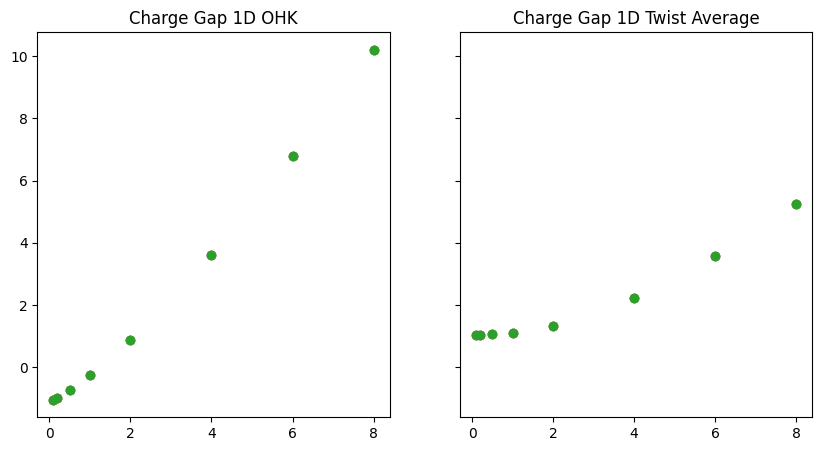

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

charge_gap_list_OHK = np.zeros(shape=(len(U_list), len(mu_list)))
charge_gap_list_twist = np.zeros_like(charge_gap_list_OHK)

for i, U in enumerate(U_list):
    mu_list = np.linspace(U/2-1, U/2+1, 3)
    for j, mu in enumerate(mu_list):
        charge_gap = ((raw_energy_dat[i,j,1,:].min() - raw_energy_dat[i,j,0,:].max()) + raw_energy_dat[i,j,2,:].min() - raw_energy_dat[i,j,0,:].max())
        charge_gap_list_OHK[i,j] = 2*charge_gap

        charge_gap_avg = (raw_energy_dat[i,j,1,:] + raw_energy_dat[i,j,2,:]- 2*raw_energy_dat[i,j,0,:]).mean()
        charge_gap_list_twist[i,j] = charge_gap_avg

for j, mu in enumerate(mu_list):
    ax1.scatter(U_list, charge_gap_list_OHK[:,j], label='mu='+str(mu))
    ax2.scatter(U_list, charge_gap_list_twist[:,j], label='mu='+str(mu))
#plt.legend()
#plt.yscale('log')
ax1.set_title('Charge Gap 1D OHK')
ax2.set_title('Charge Gap 1D Twist Average')

Text(0.5, 1.0, 'Charge Gap 1D Twist Average')

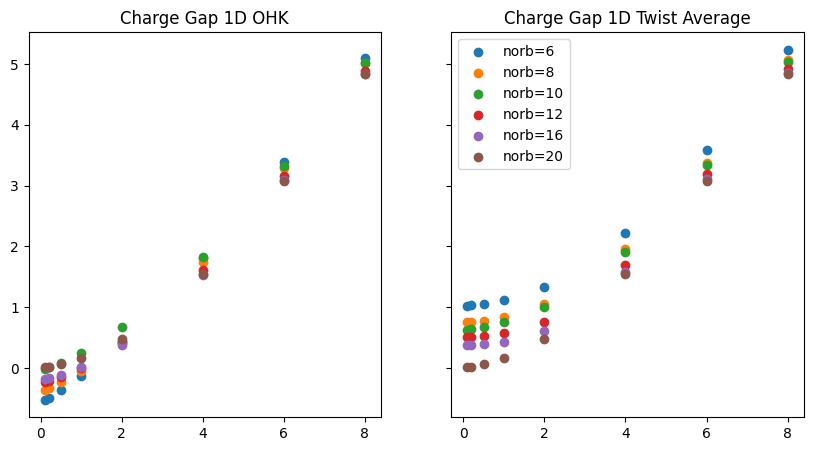

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

charge_gap_list_OHK = np.zeros(shape=(len(U_list), len(norb_list)))
charge_gap_list_twist = np.zeros_like(charge_gap_list_OHK)

for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        charge_gap = (raw_energy_dat[i,j,1,:].min() - raw_energy_dat[i,j,0,:].max())
        charge_gap_list_OHK[i,j] = 2*charge_gap

        charge_gap_avg = 2*(raw_energy_dat[i,j,1,:] - raw_energy_dat[i,j,0,:]).mean()
        charge_gap_list_twist[i,j] = charge_gap_avg

for j, norb in enumerate(norb_list):
    ax1.scatter(U_list, charge_gap_list_OHK[:,j], label='norb='+str(norb))
    ax2.scatter(U_list, charge_gap_list_twist[:,j], label='norb='+str(norb))
plt.legend()
#plt.yscale('log')
ax1.set_title('Charge Gap 1D OHK')
ax2.set_title('Charge Gap 1D Twist Average')

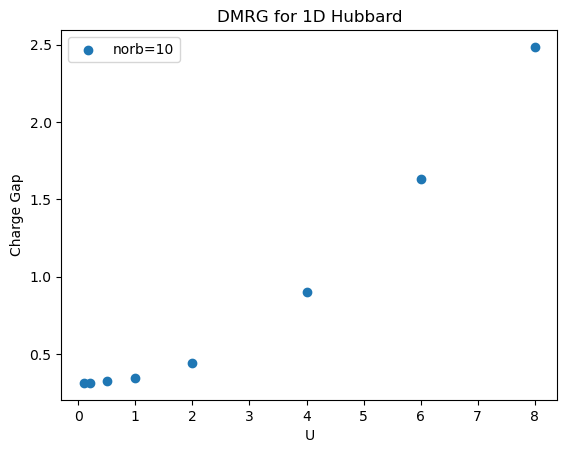

In [35]:


for i, norb in enumerate(norb_list): 
    plt.scatter(U_list, twist_avg_energy[:, i]/2, label='norb='+str(norb))
    
plt.title("DMRG for 1D Hubbard")
plt.xlabel("U")
plt.ylabel("Charge Gap")
#plt.yscale('log')
plt.legend()